In [1]:
#.libPaths(c("/home/data/refdir/Rlib","/home/data/t060324/R/x86_64-pc-linux-gnu-library/4.1"))
library(limma)
setwd('/home/data/t060324/jobs/aimin/')

In [8]:
pre_RPKM <- read.table('./data/bulk/pre_RPKM.txt',header = T,sep = '\t',row.names = 1)
dim(pre_RPKM)
colnames(pre_RPKM) <- sub(pattern = 'X',replacement = 'pre_',colnames(pre_RPKM))
pre_RPKM[1:6,1:6]

[1] 19995    20

,pre_1,pre_2,pre_5,pre_6,pre_12,pre_17
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,1.8642100,0.7138730,0.5138960,0.5965500,1.590190,1.063880
A1CF,0.0104808,0.0163626,0.0265894,0.0106653,0.115723,0.028878
A2M,30.1154000,25.2580000,62.1897000,21.7785000,10.902900,4.881190
A2ML1,1.6708900,0.1888380,1.3224500,1.0233300,0.115924,0.152972
A3GALT2,0.3148310,0.0000000,1.0139900,0.0500583,0.443700,1.726360
A4GALT,1.4386800,8.6660400,1.5920600,2.6128400,1.650020,2.838270


In [9]:
post_RPKM <- read.table('./data/bulk/post_RPKM.txt',header = T,sep = '\t',row.names = 1)
dim(post_RPKM)
colnames(post_RPKM) <- sub(pattern = 'X',replacement = 'post_',colnames(post_RPKM))
post_RPKM[1:6,1:6]

[1] 19995    20

,post_1,post_2,post_5,post_6,post_12,post_17
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,1.236680,0.9238930,1.2364500,0.3729540,1.6224900,0.8737720
A1CF,0.056426,0.0158933,0.0165624,0.0577158,0.0819705,0.0371052
A2M,86.226600,68.7988000,87.5393000,25.8717000,36.8850000,132.0120000
A2ML1,0.373196,0.1146380,0.8096570,2.6367300,0.1665720,0.4510690
A3GALT2,0.283755,0.2797350,0.7773630,0.7537870,0.3737400,0.7171090
A4GALT,4.950410,7.3232400,8.3496000,1.8873400,4.3868900,3.5391200


In [5]:
all(rownames(pre_RPKM)==rownames(post_RPKM))

[1] TRUE

In [6]:
OV_RPKM <- cbind(pre_RPKM,post_RPKM)
head(OV_RPKM)

,pre_1,pre_2,pre_5,pre_6,pre_12,pre_17,pre_19,pre_20,pre_21,pre_22,⋯,post_25,post_27,post_29,post_37,post_42,post_43,post_44,post_45,post_47,post_49
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,1.8642100,0.7138730,0.5138960,0.5965500,1.590190,1.063880,0.213224,0.8582650,1.4279600,0.6294430,⋯,0.6203150,0.6763180,0.9415790,0.523657,1.2394600,0.9240750,0.4426100,0.8519200,0.9367800,0.8087880
A1CF,0.0104808,0.0163626,0.0265894,0.0106653,0.115723,0.028878,0.137467,0.0124534,0.0118611,0.0159831,⋯,0.0118392,0.0275864,0.0133149,0.065699,0.0177354,0.0367132,0.0519299,0.0162463,0.0115504,0.0610363
A2M,30.1154000,25.2580000,62.1897000,21.7785000,10.902900,4.881190,36.348900,109.2210000,22.9010000,50.0010000,⋯,119.4390000,39.3215000,129.3950000,87.990100,74.0832000,63.5309000,46.1092000,46.7991000,28.8561000,101.0300000
A2ML1,1.6708900,0.1888380,1.3224500,1.0233300,0.115924,0.152972,2.434320,0.9087060,0.1485590,0.0827300,⋯,0.2224270,0.6175540,0.1191200,1.165980,0.3606630,3.7049000,0.1355030,0.1880400,0.5476690,0.2479980
A3GALT2,0.3148310,0.0000000,1.0139900,0.0500583,0.443700,1.726360,0.101209,0.1315140,1.8185800,0.2143360,⋯,0.1270120,0.2707270,0.1249880,1.526390,0.3585820,0.9649650,0.4874710,0.2668850,0.1807080,0.6366150
A4GALT,1.4386800,8.6660400,1.5920600,2.6128400,1.650020,2.838270,1.464560,3.7483100,1.0326700,2.6640900,⋯,3.0229500,1.1582500,3.6490600,2.898080,4.7558500,2.0158100,1.7243200,1.8467900,1.4313500,4.0388400


In [7]:
fpkm2tpm = function(fpkm){
  exp(log(fpkm) - log(sum(fpkm)) + log(1e6))
}

In [ ]:
OV_TPM = apply(OV_RPKM, 2, fpkm2tpm)

In [9]:
OV_TPM <- log2(OV_TPM+1)

In [10]:
OV_RPKM <- as.matrix(OV_RPKM)

In [ ]:
ph <- data.frame(sample=colnames(OV_TPM),
                 BioRep=sub(pattern = '[preost]+',replacement = 'P',colnames(post_RPKM)),
                 Treatment=rep(c('before','after'),c(20,20)))
ph$Treatment <- factor(x = ph$Treatment,levels = c('before','after'))

In [222]:
rownames(ph) <- ph$sample

In [224]:
clinicalData <- read.table('./data/bulk/patient_metaClinical_Melissa.txt',header = T,sep = '\t')
clinicalData$PatientID <- paste0('P_',clinicalData$PatientID)
ph_clinical <- merge.data.frame(x = ph,y = clinicalData,by.x = 'BioRep',by.y = 'PatientID',all.x = T,sort = F)
rownames(ph_clinical) <- ph_clinical$sample
ph_clinical <- ph_clinical[rownames(ph),]
ph_clinical$PlatinumSensitivity <- ifelse(ph_clinical$PlatinumSensitivity=='sensitive','sensitive','resistant')
ph_clinical$PFS.time  <- ph_clinical$PFS.time/28
ph_clinical$OS.time  <- ph_clinical$OS.time/28
head(ph_clinical)

,BioRep,sample,Treatment,DNApairEvaluable,RNApairEvaluable,Age,Ethnicity,KarnofskyScore,FIGOstage,PrimaryTumorSite,⋯,NACT_agent,chemotherapyCycles,Days_afterDebulking,NACT_response,GermlineBRCAmutationStatus,PFS,PFS.time,PlatinumSensitivity,OS,OS.time
,<chr>,<chr>,<fct>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<int>,<int>,<chr>,<chr>,<int>,<dbl>,<chr>,<int>,<dbl>
pre_1,P_1,pre_1,before,0,1,76,Caucasian,90-100,IIIC,Ovary,⋯,Carboplatin/Taxol,3,49,Complete Response,Negative,1,22.250000,sensitive,0,64.25000
pre_2,P_2,pre_2,before,1,1,56,Caucasian,90-100,IIIC,Ovary,⋯,Carboplatin/Taxol,4,45,Complete Response,BRCA 1,1,20.035714,sensitive,1,45.71429
pre_5,P_5,pre_5,before,1,1,62,Caucasian,90-100,IIIC,Fallopian Tube,⋯,Carboplatin/Taxol,3,22,Partial Response,Negative,1,11.035714,resistant,1,26.07143
pre_6,P_6,pre_6,before,1,1,57,Caucasian,50-60,IIIC,Fallopian Tube,⋯,Carboplatin/Taxol,3,55,Complete Response,Negative,1,20.000000,sensitive,0,48.92857
pre_12,P_12,pre_12,before,1,1,75,African-American,90-100,IIIC,Fallopian Tube,⋯,Carboplatin/Taxol,5,36,Partial Response,Testing not avaliable,1,8.785714,resistant,1,22.28571
pre_17,P_17,pre_17,before,1,1,65,African-American,50-60,IVA,Fallopian Tube,⋯,Carboplatin/Taxol,5,142,Partial Response,Testing not avaliable,1,12.964286,resistant,1,14.14286


In [345]:
diffGene_post <- sapply(rownames(OV_TPM),function(x){
        before <- OV_TPM[x,1:20]
        after <- OV_TPM[x,21:40]
        lgfc <- mean(after-before)
        if(lgfc>=0){
            res <- t.test(after,before, paired = TRUE,alternative = 'greater')
        }else{
            res <- t.test(after,before, paired = TRUE,alternative = 'less')
        }
        return(data.frame(gene=x,logFC=lgfc,t=res$statistic,p_value=res$p.value))
},simplify = F)

In [ ]:
diffGene_post <- do.call(rbind,diffGene_post)
head(diffGene_post)

In [349]:
diffGene_post$adj.P.Val <- p.adjust(p =diffGene_post$p_value,method ="fdr",n = length(diffGene_post$p_value))

In [350]:
diffGene_post <- subset(diffGene_post,!is.nan(t))

In [352]:
dim(diffGene_post)

[1] 19806     5

Warning message:
“ggrepel: 524 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


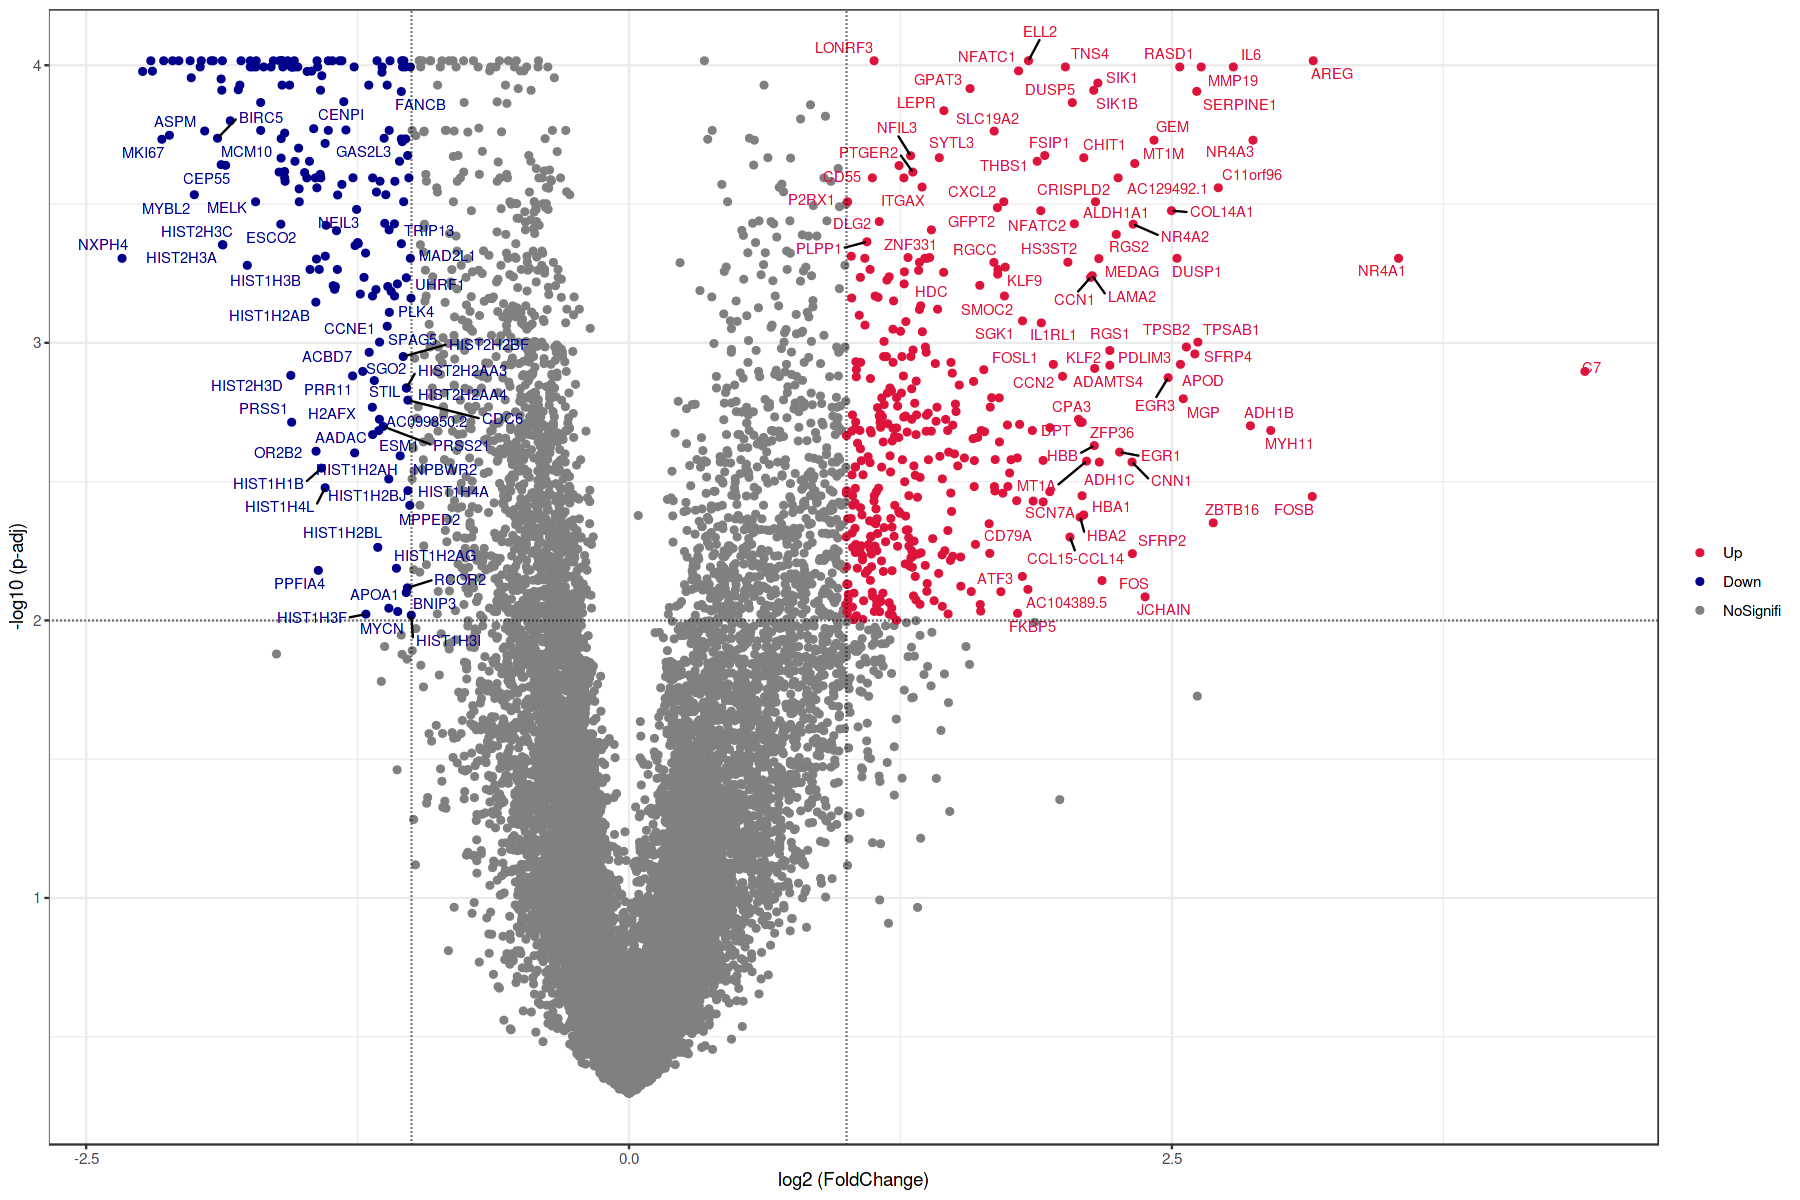

In [368]:
#加载包
library(ggplot2)
library(ggrepel)
Dat <- diffGene_post
colnames(Dat) <- c('gene','log2FoldChange','t','p_value','padj')
Dat$threshold = factor(ifelse(Dat$padj < 0.01 & abs(Dat$log2FoldChange) >= 1, ifelse(Dat$log2FoldChange>=1 ,'Up','Down'),'NoSignifi'),levels=c('Up','Down','NoSignifi'))
Gene <- subset(Dat,padj<0.01 & abs(log2FoldChange)>1)$gene
options(repr.plot.height = 10, repr.plot.width = 15)
p1 <- ggplot(Dat,aes(x=log2FoldChange,y=-log10(padj),color=threshold))+
  geom_point()+
  scale_color_manual(values=c("#DC143C","#00008B","#808080"))+#确定点的颜色
  geom_text_repel(
    data = Dat[Dat$padj<0.01 & abs(Dat$log2FoldChange)>1,],
    aes(label = Gene),
    size = 3,
    segment.color = "black", show.legend = FALSE )+#添加关注的点的基因名
  theme_bw()+#修改图片背景
  theme(
    legend.title = element_blank()#不显示图例标题
  )+ 
  ylab('-log10 (p-adj)')+#修改y轴名称
  xlab('log2 (FoldChange)')+#修改x轴名称
  geom_vline(xintercept=c(-1,1),lty=3,col="black",lwd=0.5) +#添加横线|FoldChange|>2
  geom_hline(yintercept = -log10(0.01),lty=3,col="black",lwd=0.5)#添加竖线padj<0.05
p1

In [369]:
pdf('./output/bulk/0.DiffGene_post_volcano.pdf',width = 15,height = 10)
p1
dev.off()

Warning message:
“ggrepel: 409 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


png 
  2

In [418]:
saveRDS(OV_TPM,file = './output/bulk_OV_TPM_Melissa.RDS')
saveRDS(ph_clinical,file = './output/bulk_ph_clinical_Melissa.RDS')

In [416]:
saveRDS(diffGene_post,file = './output/bulk_DiffGene_postNACT.RDS')

In [3]:
diffGene_post <- readRDS(file = './output/bulk_DiffGene_postNACT.RDS')

##  Differential expression heatmap

In [390]:
library('ComplexHeatmap')

In [408]:
Exp <- OV_TPM[subset(diffGene_post,adj.P.Val<0.01 & abs(logFC)>2)$gene,]
Exp <- t(scale(t(Exp)))
dim(Exp)


[1] 67 40

In [409]:
class(Exp)

[1] "matrix" "array"

In [410]:
head(ph_clinical)

,BioRep,sample,Treatment,DNApairEvaluable,RNApairEvaluable,Age,Ethnicity,KarnofskyScore,FIGOstage,PrimaryTumorSite,⋯,NACT_agent,chemotherapyCycles,Days_afterDebulking,NACT_response,GermlineBRCAmutationStatus,PFS,PFS.time,PlatinumSensitivity,OS,OS.time
,<chr>,<chr>,<fct>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<int>,<int>,<chr>,<chr>,<int>,<dbl>,<chr>,<int>,<dbl>
pre_1,P_1,pre_1,before,0,1,76,Caucasian,90-100,IIIC,Ovary,⋯,Carboplatin/Taxol,3,49,Complete Response,Negative,1,22.250000,sensitive,0,64.25000
pre_2,P_2,pre_2,before,1,1,56,Caucasian,90-100,IIIC,Ovary,⋯,Carboplatin/Taxol,4,45,Complete Response,BRCA 1,1,20.035714,sensitive,1,45.71429
pre_5,P_5,pre_5,before,1,1,62,Caucasian,90-100,IIIC,Fallopian Tube,⋯,Carboplatin/Taxol,3,22,Partial Response,Negative,1,11.035714,resistant,1,26.07143
pre_6,P_6,pre_6,before,1,1,57,Caucasian,50-60,IIIC,Fallopian Tube,⋯,Carboplatin/Taxol,3,55,Complete Response,Negative,1,20.000000,sensitive,0,48.92857
pre_12,P_12,pre_12,before,1,1,75,African-American,90-100,IIIC,Fallopian Tube,⋯,Carboplatin/Taxol,5,36,Partial Response,Testing not avaliable,1,8.785714,resistant,1,22.28571
pre_17,P_17,pre_17,before,1,1,65,African-American,50-60,IVA,Fallopian Tube,⋯,Carboplatin/Taxol,5,142,Partial Response,Testing not avaliable,1,12.964286,resistant,1,14.14286


In [411]:
column_ha <- HeatmapAnnotation(
  Treatment = ph_clinical$Treatment,
    BioRep=ph_clinical$BioRep,
  PlatinumSensitivity = ph_clinical$PlatinumSensitivity,
  OS = ifelse(ph_clinical$OS==1,'death','survival'),
    col=list(Treatment = c("after" =  "red", "before" = "blue"),PlatinumSensitivity=c('resistant'='brown','sensitive'='cyan'))
  )


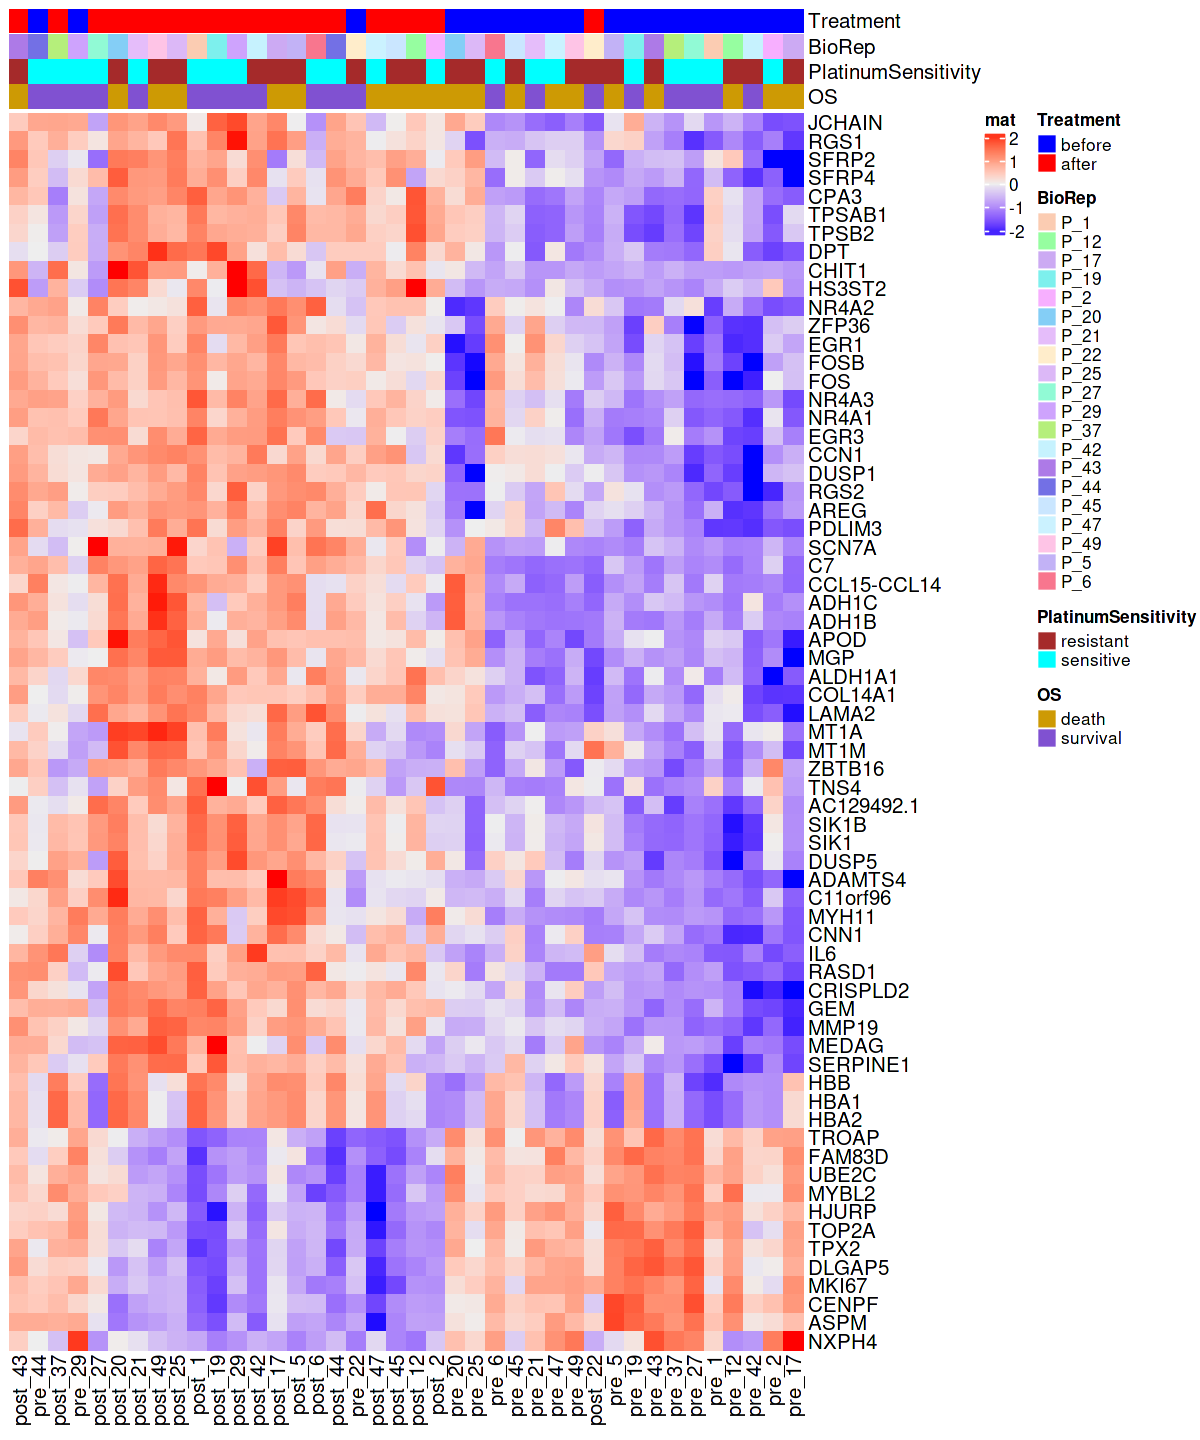

In [415]:
options(repr.plot.height = 12, repr.plot.width = 10)
Heatmap(
  Exp,cluster_columns = TRUE, clustering_method_columns = 'average',
  name = "mat", show_column_dend = F,show_row_dend=F,
  top_annotation = column_ha
  )

In [419]:
pdf(file = './output/bulk/0.DiffGene_post_heatmap.pdf',width = 10,height = 12)
Heatmap(
  Exp,cluster_columns = TRUE, clustering_method_columns = 'average',
  name = "mat", show_column_dend = F,show_row_dend=F,
  top_annotation = column_ha
  )
dev.off()

png 
  2